# Host classification using K-nearest neighbor classifier

In this notebook, we are going to perform KNN classification on dataset with hosts in subnet consisting of 22 units. 

## Imports

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Import dataset

We are using pickled preprocessed dataframe of host network behaviour 

In [2]:
df = pd.read_pickle('../../dataset/balanced_preprocessed_dataset.pkl')
df.head()

mean                                                              \
  FlowDuration                                                               
            00        01        02        03        04        05        06   
0    -0.007622 -0.006103 -0.009019 -0.006422 -0.012099 -0.007141 -0.007069   
1    -0.009677 -0.011074 -0.010790 -0.008082 -0.013610 -0.009863 -0.009743   
2    -0.009484 -0.010427 -0.010896 -0.008080 -0.013609 -0.009918 -0.009838   
3    -0.009932 -0.011126 -0.010762 -0.007984 -0.013595 -0.009918 -0.009470   
4    -0.007484 -0.005790 -0.008930 -0.006322 -0.012029 -0.007007 -0.006911   

                                     ...            max                      \
                                     ...          Bytes                       
         07        08        09      ...             19        20        21   
0 -0.012616 -0.009572 -0.011851      ...      -0.015290 -0.014971 -0.016604   
1 -0.014340 -0.011510 -0.014119      ...      -0.015291 -0.014971 -0.016604   
2 -0.014320 -0.011545 -0.013922      ...      -0.015291 -0.014971 -0.016604   
3 -0.014341 -0.011979 -0.014230      ...      -0.015291 -0.014971 -0.016604   
4 -0.012538 -0.009441 -0.011706      ...      -0.015274 -0.014955 -0.016588   

                               Label  \
                               Label   
         22        23 anon_net_range   
0 -0.016766 -0.016320             28   
1 -0.016766 -0.016320             28   
2 -0.016766 -0.016320             28   
3 -0.016766 -0.016320             28   
4 -0.016752 -0.016307             26   

                                                              \
                                                               
                                          addr_range    unit   
0  ef160f55b36bd48b37f22bc9c48819b1a0259c2dd27ccc...  CEITEC   
1  93b8f5a052053b0db4731b671f78b8c5e5817d38d51ba9...  CEITEC   
2  ac600c8985d0f198d532737ea9d58db00905c6c6bebb6b...  CEITEC   
3  48bab257d30b1c6eaa225275fe60fc5e1dfe61afe54ace...  CEITEC   
4  1cd00c373ace404b829e822bf076631b564bf2bc70db82...  CEITEC   

                                                     Unit_encoding  
                                                                    
                                             subunit                
0   frontendy diskovych poli a aplikacni servery ...             0  
1   frontendy diskovych poli a aplikacni servery ...             0  
2   frontendy diskovych poli a aplikacni servery ...             0  
3   frontendy diskovych poli a aplikacni servery ...             0  
4                                                CRS             0  

[5 rows x 653 columns]

In [3]:
df['Label', 'Label', 'unit'].value_counts()

UVT              3500
SKM              3246
PrirF            2599
CEITEC           2223
LF               1475
FI               1289
FF               1089
FIeduroamnaFI    1020
FSS               802
PedF              740
UKB               649
ESF               554
PravF             536
RMU               429
FSpS              410
Teiresias         130
Telc               99
IBA                96
VPN                83
CTT                19
FNBrno              7
CESNET              3
Name: (Label, Label, unit), dtype: int64

## Dividing dataset into train/test split

In [4]:
from sklearn.model_selection import train_test_split
x = df.drop(['Label', 'Unit_encoding'], level=0, axis=1)
y = df['Unit_encoding']
x.head()

mean                                                              \
  FlowDuration                                                               
            00        01        02        03        04        05        06   
0    -0.007622 -0.006103 -0.009019 -0.006422 -0.012099 -0.007141 -0.007069   
1    -0.009677 -0.011074 -0.010790 -0.008082 -0.013610 -0.009863 -0.009743   
2    -0.009484 -0.010427 -0.010896 -0.008080 -0.013609 -0.009918 -0.009838   
3    -0.009932 -0.011126 -0.010762 -0.007984 -0.013595 -0.009918 -0.009470   
4    -0.007484 -0.005790 -0.008930 -0.006322 -0.012029 -0.007007 -0.006911   

                                   ...          max                      \
                                   ...        Bytes                       
         07        08        09    ...           14        15        16   
0 -0.012616 -0.009572 -0.011851    ...    -0.018135 -0.017941 -0.017531   
1 -0.014340 -0.011510 -0.014119    ...    -0.018135 -0.017942 -0.017531   
2 -0.014320 -0.011545 -0.013922    ...    -0.018135 -0.017942 -0.017531   
3 -0.014341 -0.011979 -0.014230    ...    -0.018135 -0.017942 -0.017531   
4 -0.012538 -0.009441 -0.011706    ...    -0.018115 -0.017918 -0.017516   

                                                                         
                                                                         
         17        18        19        20        21        22        23  
0 -0.017640 -0.015971 -0.015290 -0.014971 -0.016604 -0.016766 -0.016320  
1 -0.017641 -0.015971 -0.015291 -0.014971 -0.016604 -0.016766 -0.016320  
2 -0.017641 -0.015971 -0.015291 -0.014971 -0.016604 -0.016766 -0.016320  
3 -0.017641 -0.015971 -0.015291 -0.014971 -0.016604 -0.016766 -0.016320  
4 -0.017627 -0.015957 -0.015274 -0.014955 -0.016588 -0.016752 -0.016307  

[5 rows x 648 columns]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Apply KNN

In [6]:
k = 3 # usually a good starting point

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [8]:
prediction = knn.predict(x_test)

## Evaluate KNN performance

In [9]:
from sklearn.metrics import confusion_matrix, classification_report

In [10]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.49      0.70      0.57       438
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.22      0.46      0.30        96
           4       0.34      0.59      0.43       226
           5       0.36      0.51      0.42       268
           6       0.76      0.90      0.82       202
           7       0.00      0.00      0.00         4
           8       0.59      0.58      0.59       147
           9       0.12      0.11      0.11        66
          10       0.23      0.17      0.19        18
          11       0.33      0.29      0.31       296
          12       0.40      0.27      0.32       146
          13       0.71      0.51      0.60       119
          14       0.60      0.47      0.53       530
          15       0.41      0.18      0.25        79
          16       0.86      0.69      0.77       644
          17       0.86    

/home/smeriga/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/smeriga/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/smeriga/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/smeriga/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_f

In [11]:
print(confusion_matrix(y_test, prediction))

[[307   0   0   3   6  19   0   0   2  25   1  44   2   2  10   0   2   0
    0  10   5   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  3   0   1  44  12   8   2   0   3   0   0   9   3   0   6   2   1   0
    0   0   2   0]
 [  9   0   2  22 134  11   1   0   3   2   0  12   1   2  11   2  10   0
    0   2   2   0]
 [ 29   0   0  20  32 137   8   0   7   0   0   5   3   2  17   1   3   0
    0   1   3   0]
 [  1   0   0   6   2   5 181   0   1   0   0   0   0   0   0   0   0   0
    0   0   6   0]
 [  0   0   0   0   0   0   0   0   0   0   0   2   0   0   1   0   0   0
    0   1   0   0]
 [  8   0   0   5  11  11   5   0  85   1   0   5   2   1   4   0   5   0
    1   1   2   0]
 [ 41   0   0   2   3   2   0   0   1   7   0   4   1   0   0   0   2   0
    0   3   0   0]
 [  2   0   0   2   5   3   0   0   1   0   3   1   1   0   0   0   0 

## Trying various K values

We are going to plot k values against the error rate, to see if lower/higher k value can improve the classifier accuracy 

In [12]:
error_rate = []
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.20)
k = 22
for i in range(1,k+1):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    unit_prediction_i = knn.predict(x_test)
    error_rate.append(np.mean(unit_prediction_i != y_test))
    print('K value of: ' + str(i) + ', error rate: ' + str(error_rate[i - 1]))

K value of: 1, error rate: 0.435952380952381
K value of: 2, error rate: 0.4583333333333333
K value of: 3, error rate: 0.4319047619047619
K value of: 4, error rate: 0.42238095238095236
K value of: 5, error rate: 0.41214285714285714
K value of: 6, error rate: 0.4123809523809524
K value of: 7, error rate: 0.4073809523809524
K value of: 8, error rate: 0.41023809523809524
K value of: 9, error rate: 0.4073809523809524
K value of: 10, error rate: 0.4066666666666667
K value of: 11, error rate: 0.4073809523809524
K value of: 12, error rate: 0.40476190476190477
K value of: 13, error rate: 0.4083333333333333
K value of: 14, error rate: 0.4066666666666667
K value of: 15, error rate: 0.40523809523809523
K value of: 16, error rate: 0.4076190476190476
K value of: 17, error rate: 0.4073809523809524
K value of: 18, error rate: 0.4064285714285714
K value of: 19, error rate: 0.4092857142857143
K value of: 20, error rate: 0.40976190476190477
K value of: 21, error rate: 0.4083333333333333
K value of: 22, e

## Plotting error rate graph

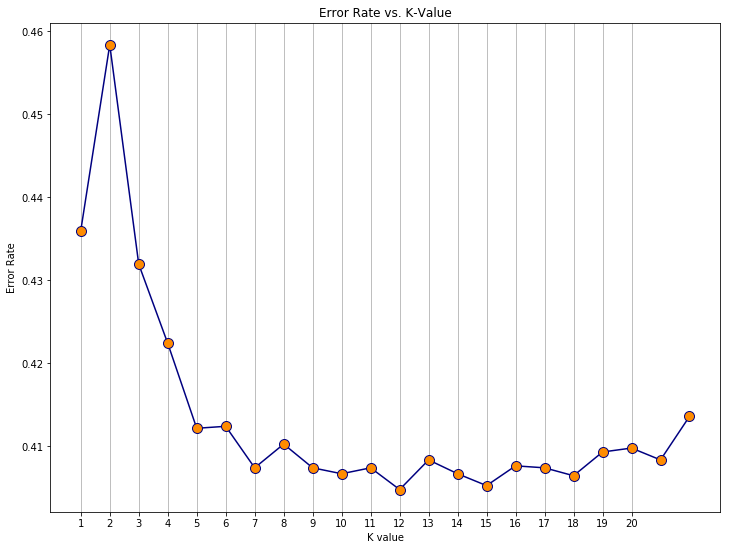

In [13]:
plt.figure(figsize=(12,9))
plt.plot(range(1,k+1),error_rate, color='navy', linestyle='solid', marker='o',
         markerfacecolor='darkorange', markersize=10)
plt.title('Error Rate vs. K-Value')
plt.xlabel('K value')
plt.ylabel('Error Rate')
plt.xticks(np.linspace(1, 20, 20))
plt.grid(b=True, which='major', axis='x')